In [1]:
# Uncomment this if any part of it is missing (needed to run the code below)
!pip3 install pandas
!pip3 install seaborn
!pip3 install scipy
!pip3 install matplotlib
!pip3 install numpy
!pip3 install openpyxl


In [2]:
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import numpy as np
import glob

In [3]:
# CONTINUOUS OUTCOME
#TRACK_ID 
#TRACK_DURATION
#TRACK_MEDIAN_SPEED
#TRACK_DISPLACEMENT
#TRACK_MAXSPEED
#TRACK_MINSPEED
#TOTAL_DISTANCE_TRAVELLED
#MAX_DISTANCE_TRAVELLED
#LINEARITY_OF_FORWARD_PROGRESSION
# number of gaps

In [4]:
files = glob.glob('./data/*.csv')

Remove 2nd and 3rd row of the files

In [5]:
files[1]

'./data\\231220_ctrl2.csv'

In [6]:
dfs = [pd.read_csv(file, index_col=False, sep=',').drop([0,1,2]) for file in files]
for i in range(0,len(files)):
    dfs[i]['Filename']=files[i].strip('./data/')

In [7]:
dfs[1].head()

,LABEL,TRACK_INDEX,TRACK_ID,NUMBER_SPOTS,NUMBER_GAPS,NUMBER_SPLITS,NUMBER_MERGES,NUMBER_COMPLEX,LONGEST_GAP,TRACK_DURATION,...,TRACK_MEDIAN_SPEED,TRACK_STD_SPEED,TRACK_MEAN_QUALITY,TOTAL_DISTANCE_TRAVELED,MAX_DISTANCE_TRAVELED,CONFINEMENT_RATIO,MEAN_STRAIGHT_LINE_SPEED,LINEARITY_OF_FORWARD_PROGRESSION,MEAN_DIRECTIONAL_CHANGE_RATE,Filename
3,Track_13443,0,0,80,0,0,0,0,0,119.523,...,0.02459299714141785,0.014903818538761195,641.6875,3.2524932077941977,0.15087120044834382,0.03504201394152682,9.535730556649813E-4,0.035042013941526826,1.3639174944140762,\231220_ctrl2.csv
4,Track_13444,1,1,52,8,0,0,0,11,119.523,...,0.30419873754347826,0.11034683435104499,858.6538461538462,39.0243541455194,37.05454231141662,0.9495235250593135,0.3100201828218554,0.9519138239113344,0.13047170855711998,\231220_ctrl2.csv
5,Track_13445,2,2,72,5,0,0,0,3,119.523,...,0.03916062813355008,0.028232141989563656,391.0833333333333,5.057862812486433,0.2376902247212809,0.01972173303653166,8.345659004815695E-4,0.018582524589070955,1.1883389851045216,\231220_ctrl2.csv
6,Track_13446,3,3,26,6,0,0,0,10,86.23811392405064,...,0.0542657094762717,0.23644700293163778,309.2692307692308,8.455437018842987,1.6332907625180508,0.01542133500541709,0.0015120243353144314,0.010442369663836827,0.9500140304453146,\231220_ctrl2.csv
7,Track_13447,4,4,79,1,0,0,0,1,119.523,...,0.06700317354619786,0.04053794632157332,269.73417721518985,8.823485680994366,0.3104760024539387,0.03518745467255628,0.00259762558213849,0.03507304370051543,1.4271020028341903,\231220_ctrl2.csv


Different Dates are biological replicates. Different ctrl and treatment numbers correspond to technical replicates

In [8]:
ct_df=pd.concat(dfs)
ct_df=ct_df[~pd.isnull(ct_df['LABEL'])]

In [9]:
ct_df['TRACK_ID_R']=ct_df.LABEL.apply(lambda x: x.split('_')[-1])
ct_df['TRACK_ID_R']=ct_df['TRACK_ID_R'].astype(int)

Use the Record excell sheet to filter and classied the data


In [10]:
# Add decoding the output data based on the excel sheet with
# rows being wanted tracks
# and with the following information as column: 
# experiment, filename, treatment, replicate, date, and wanted track    
filt_df=pd.read_excel('./data/Record.xlsx')
filt_df['Filename']=filt_df['filename'].astype(str)+'.csv' 
filt_df['TRACK_ID_R']=filt_df['wanted_tracks']

In [11]:
# check that filt_df has the same files as ct_df
set(filt_df.Filename)-set(ct_df.Filename)

{'231220_ctrl.csv',
 '231220_ctrl2.csv',
 '231220_ctrl3.csv',
 '240211_ctrl.csv',
 '240211_ctrl2.csv',
 '240211_ctrl3.csv',
 '240220_ctrl.csv',
 '240220_ctrl2.csv',
 '240220_ctrl3.csv',
 '240221_10.csv',
 '240221_102.csv',
 '240221_103.csv',
 '240221_104.csv',
 '240221_ctrl.csv',
 '240221_ctrl2.csv',
 '240227_10.csv',
 '240227_102.csv',
 '240227_103.csv',
 '240227_104.csv',
 '240227_ctrl.csv',
 '240227_ctrl3.csv',
 '240314_.csv',
 '240314_4.csv',
 '240314_5.csv',
 '240315_ablated.csv',
 '240315_ablated10.csv',
 '240315_ablated11.csv',
 '240315_ablated6.csv',
 '240315_ablated7.csv',
 '240315_ablated8.csv',
 '240315_ablated9.csv',
 '240315_regenerated2.csv',
 '240315_regenerated3.csv',
 '240315_regenerated4.csv',
 '240315_regenerated5.csv',
 '240315_regenerated6.csv',
 '240604_ciliobrevin10.csv',
 '240604_ciliobrevin102.csv',
 '240604_ciliobrevin103.csv',
 '240604_ciliobrevin104.csv',
 '240604_ctrl.csv',
 '240604_ctrl2.csv',
 '240604_ctrl3.csv',
 '240610_ablated1.csv',
 '240610_ablated3.

In [12]:
set(ct_df.Filename)-set(filt_df.Filename)

{'\\231220_ctrl.csv',
 '\\231220_ctrl2.csv',
 '\\231220_ctrl3.csv',
 '\\240211_ctrl.csv',
 '\\240211_ctrl2.csv',
 '\\240211_ctrl3.csv',
 '\\240220_ctrl.csv',
 '\\240220_ctrl2.csv',
 '\\240220_ctrl3.csv',
 '\\240221_10.csv',
 '\\240221_102.csv',
 '\\240221_103.csv',
 '\\240221_104.csv',
 '\\240221_ctrl1.csv',
 '\\240221_ctrl2.csv',
 '\\240227_10.csv',
 '\\240227_102.csv',
 '\\240227_103.csv',
 '\\240227_104.csv',
 '\\240227_ctrl.csv',
 '\\240227_ctrl3.csv',
 '\\240314_.csv',
 '\\240314_4.csv',
 '\\240314_5.csv',
 '\\240315_ablated.csv',
 '\\240315_ablated10.csv',
 '\\240315_ablated11.csv',
 '\\240315_ablated6.csv',
 '\\240315_ablated7.csv',
 '\\240315_ablated8.csv',
 '\\240315_ablated9.csv',
 '\\240315_regenerated2.csv',
 '\\240315_regenerated3.csv',
 '\\240315_regenerated4.csv',
 '\\240315_regenerated5.csv',
 '\\240315_regenerated6.csv',
 '\\240604_ciliobrevin10.csv',
 '\\240604_ciliobrevin102.csv',
 '\\240604_ciliobrevin103.csv',
 '\\240604_ciliobrevin104.csv',
 '\\240604_ctrl.csv',
 

In [13]:
ct_df['Filename'] = ct_df['Filename'].str[1:]
ct_df.head(5)

,LABEL,TRACK_INDEX,TRACK_ID,NUMBER_SPOTS,NUMBER_GAPS,NUMBER_SPLITS,NUMBER_MERGES,NUMBER_COMPLEX,LONGEST_GAP,TRACK_DURATION,...,TRACK_STD_SPEED,TRACK_MEAN_QUALITY,TOTAL_DISTANCE_TRAVELED,MAX_DISTANCE_TRAVELED,CONFINEMENT_RATIO,MEAN_STRAIGHT_LINE_SPEED,LINEARITY_OF_FORWARD_PROGRESSION,MEAN_DIRECTIONAL_CHANGE_RATE,Filename,TRACK_ID_R
3,Track_0,0,0,18,1,0,0,0,7,36.31777215189874,...,0.09778499254987526,894.0,5.011082794335635,4.026874919002516,0.8035937709020423,0.11087890804976004,0.6926745205246948,0.2156558546413198,231220_ctrl.csv,0
4,Track_1,1,1,21,1,0,0,0,1,31.77805063291139,...,0.034885708709061124,248.52380952380952,1.8361873615997426,0.20078719537437634,0.018251469377069215,0.0010545995343745498,0.017684746134724882,1.3875914769209963,231220_ctrl.csv,1
5,Track_2,2,2,16,1,0,0,0,1,24.211848101265822,...,0.24332326164536447,515.625,8.050107927995636,5.012307464281598,0.6127299503713309,0.20372431755619452,0.5850764704694119,0.4925770289950181,231220_ctrl.csv,2
6,Track_3,3,3,80,0,0,0,0,0,119.54599999999999,...,0.17158208767531632,904.65,44.498679457772134,41.90366302098622,0.9416832933379854,0.35052333847210465,0.9416832933379851,0.10519162078303311,231220_ctrl.csv,3
7,Track_4,4,4,80,0,0,0,0,0,119.54599999999999,...,0.017267128147252186,989.25,3.715304596291263,1.5571687891237482,0.39779393246532263,0.012362819547832547,0.39779393246532285,1.1170544445604838,231220_ctrl.csv,4


In [14]:
filt_df.head(5)

,experiment,filename,treatment,replicate,date,wanted_tracks,Filename,TRACK_ID_R
0,Metrics,231220_ctrl2,NaN,1,231220.0,13483,231220_ctrl2.csv,13483
1,Metrics,231220_ctrl2,NaN,1,231220.0,13508,231220_ctrl2.csv,13508
2,Metrics,231220_ctrl2,NaN,1,231220.0,13640,231220_ctrl2.csv,13640
3,Metrics,231220_ctrl2,NaN,1,231220.0,13569,231220_ctrl2.csv,13569
4,Metrics,231220_ctrl2,NaN,1,231220.0,13656,231220_ctrl2.csv,13656


In [15]:
df=pd.merge(ct_df,filt_df, on=['Filename','TRACK_ID_R'])

In [16]:
df.head(5)

,LABEL,TRACK_INDEX,TRACK_ID,NUMBER_SPOTS,NUMBER_GAPS,NUMBER_SPLITS,NUMBER_MERGES,NUMBER_COMPLEX,LONGEST_GAP,TRACK_DURATION,...,LINEARITY_OF_FORWARD_PROGRESSION,MEAN_DIRECTIONAL_CHANGE_RATE,Filename,TRACK_ID_R,experiment,filename,treatment,replicate,date,wanted_tracks
0,Track_62,62,62,80,0,0,0,0,0,119.54599999999999,...,0.9159602404785359,0.35109116514201116,231220_ctrl.csv,62,Metrics,231220_ctrl,NaN,1,231220.0,62
1,Track_89,89,89,80,0,0,0,0,0,119.54599999999999,...,0.9509899671766617,0.24000099024538002,231220_ctrl.csv,89,Metrics,231220_ctrl,NaN,1,231220.0,89
2,Track_131,131,131,21,1,0,0,0,3,34.804531645569625,...,0.7580452620466459,0.16403527163557705,231220_ctrl.csv,131,Metrics,231220_ctrl,NaN,1,231220.0,131
3,Track_138,138,138,44,1,0,0,0,1,66.58258227848101,...,0.9722613819980905,0.07404510889111594,231220_ctrl.csv,138,Metrics,231220_ctrl,NaN,1,231220.0,138
4,Track_177,177,177,14,3,0,0,0,7,46.91045569620253,...,0.9745310489411785,0.09846015310875124,231220_ctrl.csv,177,Metrics,231220_ctrl,NaN,1,231220.0,177


In [17]:
df['treatment'].isna()

0      True
1      True
2      True
3      True
4      True
       ... 
685    True
686    True
687    True
688    True
689    True
Name: treatment, Length: 690, dtype: bool

In [18]:
# Assuming that empty treatment row is no treatment
df.loc[df['treatment'].isna(),'treatment']='No'
df['treatment']

0      No
1      No
2      No
3      No
4      No
       ..
685    No
686    No
687    No
688    No
689    No
Name: treatment, Length: 690, dtype: object

In [19]:
df['treatment']

0      No
1      No
2      No
3      No
4      No
       ..
685    No
686    No
687    No
688    No
689    No
Name: treatment, Length: 690, dtype: object

Take the output measures from  TrackMate that you are interested in

In [20]:
intcols=[
'TRACK_MEDIAN_SPEED',
'TRACK_MAX_SPEED',
'TRACK_MIN_SPEED',
'TOTAL_DISTANCE_TRAVELED',
'CONFINEMENT_RATIO',
'LINEARITY_OF_FORWARD_PROGRESSION']

legcols=[
    'Track median speed ($\mu$m/sec)',
    'Track max speed ($\mu$m/sec)',
    'Track min speed ($\mu$m/sec)',
    'Total distance travelled ($\mu$m)',
    'Confinement ratio (no unit)',
    'Linearity of forward progression (no unit)'
]

<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
C:\Users\mfreired\AppData\Local\Temp\ipykernel_28592\4068604998.py:10: SyntaxWarning: invalid escape sequence '\m'
  'Track median speed ($\mu$m/sec)',
C:\Users\mfreired\AppData\Local\Temp\ipykernel_28592\4068604998.py:11: SyntaxWarning: invalid escape sequence '\m'
  'Track max speed ($\mu$m/sec)',
C:\Users\mfreired\AppData\Local\Temp\ipykernel_28592\4068604998.py:12: SyntaxWarning: invalid escape sequence '\m'
  'Track min speed ($\mu$m/sec)',
C:\Users\mfreired\AppData\Local\Temp\ipykernel_28592\4068604998.py:13: SyntaxWarning: invalid escape sequence '\m'
  'Total distance travelled

In [21]:
for i in intcols:
    print(i)
    print(len(df[pd.isnull(df[i])]))

TRACK_MEDIAN_SPEED
0
TRACK_MAX_SPEED
0
TRACK_MIN_SPEED
0
TOTAL_DISTANCE_TRAVELED
0
CONFINEMENT_RATIO
0
LINEARITY_OF_FORWARD_PROGRESSION
0


In [22]:
# converts all columns of interest to numbers from character objects
df[intcols] = df[intcols].apply(pd.to_numeric)

In [23]:
df_all=df

# C.flexa Metrics experiment

In [24]:
df=df_all[df_all['experiment']=='Metrics']

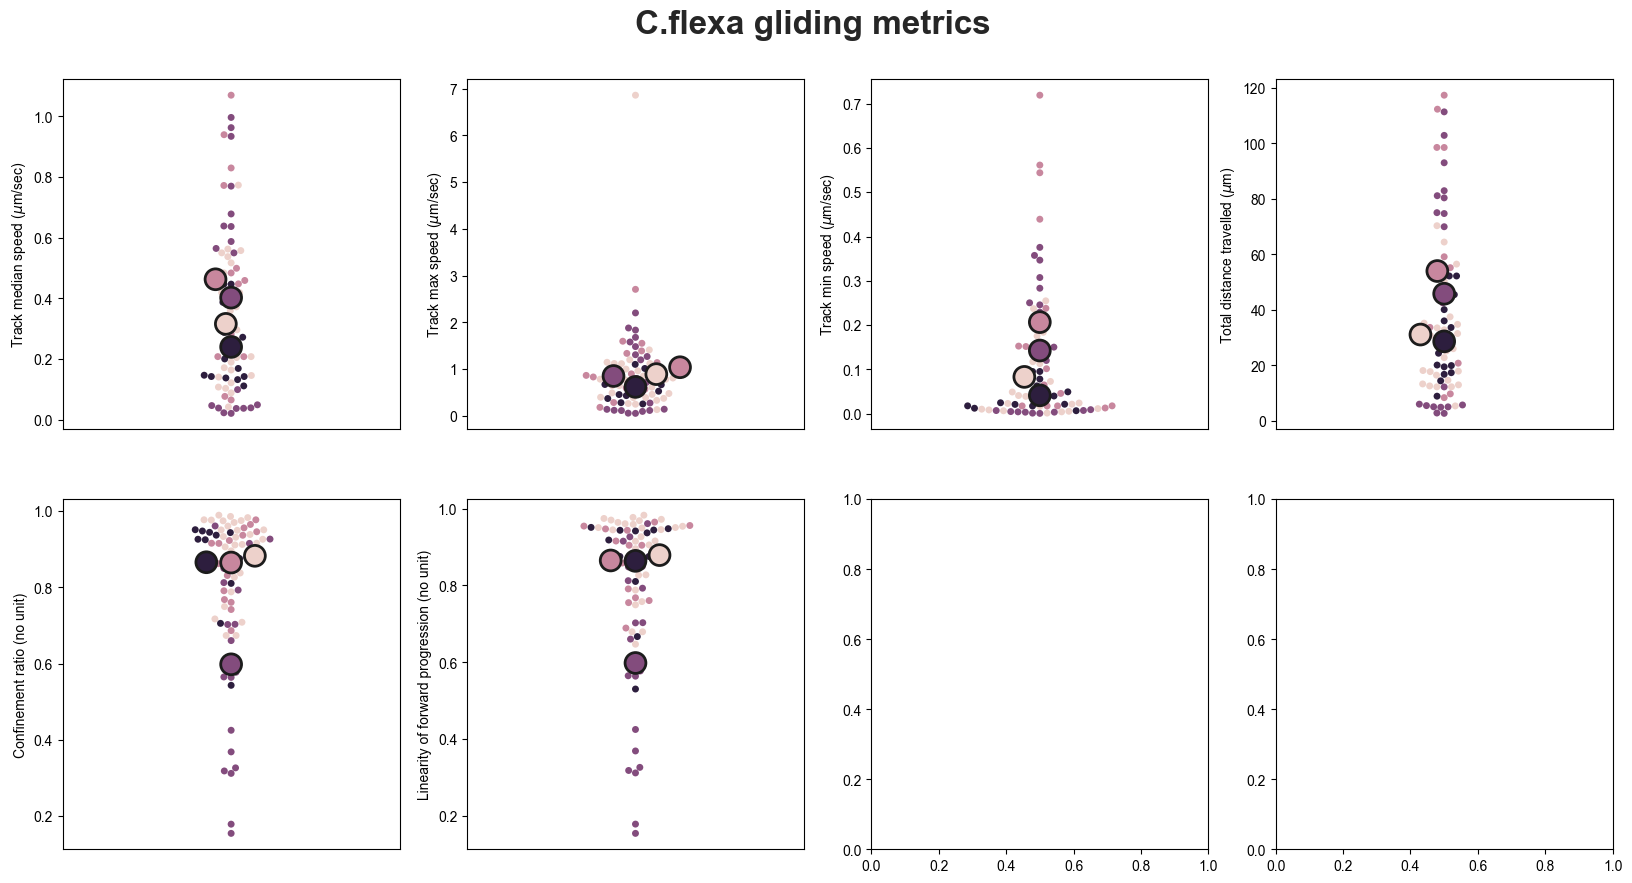

In [25]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10), facecolor='white') 
#plt.figure(figsize=(20,10))
i=0
j=0
for vars in intcols:
    i+=1
    sns.set_style('white')
    ReplicateAverages = df.groupby(['replicate','treatment'], as_index=False).agg({vars: "mean"})
    ReplicateAvePivot = ReplicateAverages.pivot_table(columns='treatment', values=vars, index="replicate")
    #statistic, pvalue = scipy.stats.ttest_rel(ReplicateAvePivot['Control'], ReplicateAvePivot['Drug'])
    #P_value = str(float(round(pvalue, 3)))
    plt.subplot(2,4,i)
    sns.swarmplot(x="treatment", y=vars, hue="replicate", data=df,legend=None)
    ax = sns.swarmplot(x="treatment", y=vars, hue="replicate", size=15, linewidth=2, data=ReplicateAverages)
    lines,labels=ax.get_legend_handles_labels()
    #ax.legend_.remove()
    x1, x2 = 0, 1
    y, h, col = df[vars].max() + 2, 2, 'k'
    #plt.ylim(0,1.1)
    plt.xlabel('')
    plt.ylabel(legcols[j])
    ax.set_xticks([])
    j+=1
    ax.legend_.remove() 




#plt.suptitle('Gliding movement metrics') 

#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
#plt.text((x1+x2)*.5, y+h*2, "P = "+P_value, ha='center', va='bottom', color=col)
fig.suptitle('C.flexa gliding metrics', fontsize=24,weight='bold', y=0.95)
fig.savefig('./figures/movement_metrics_gliding_control.svg',format='svg')

# C.flexa flagela ablation

In [38]:
df=df_all[df_all['experiment']=='Flagela Ablation']

In [37]:
df_all.experiment.value_counts()

experiment
Dynein Inhibition    327
Flagela Ablation     243
Metrics               80
monosiga              21
srosetta              19
Name: count, dtype: int64

C:\Users\mfreired\AppData\Local\Temp\ipykernel_28592\3209283442.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['treatment'] = df['treatment'].replace({
c:\Users\mfreired\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 41.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\mfreired\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\mfreired\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn

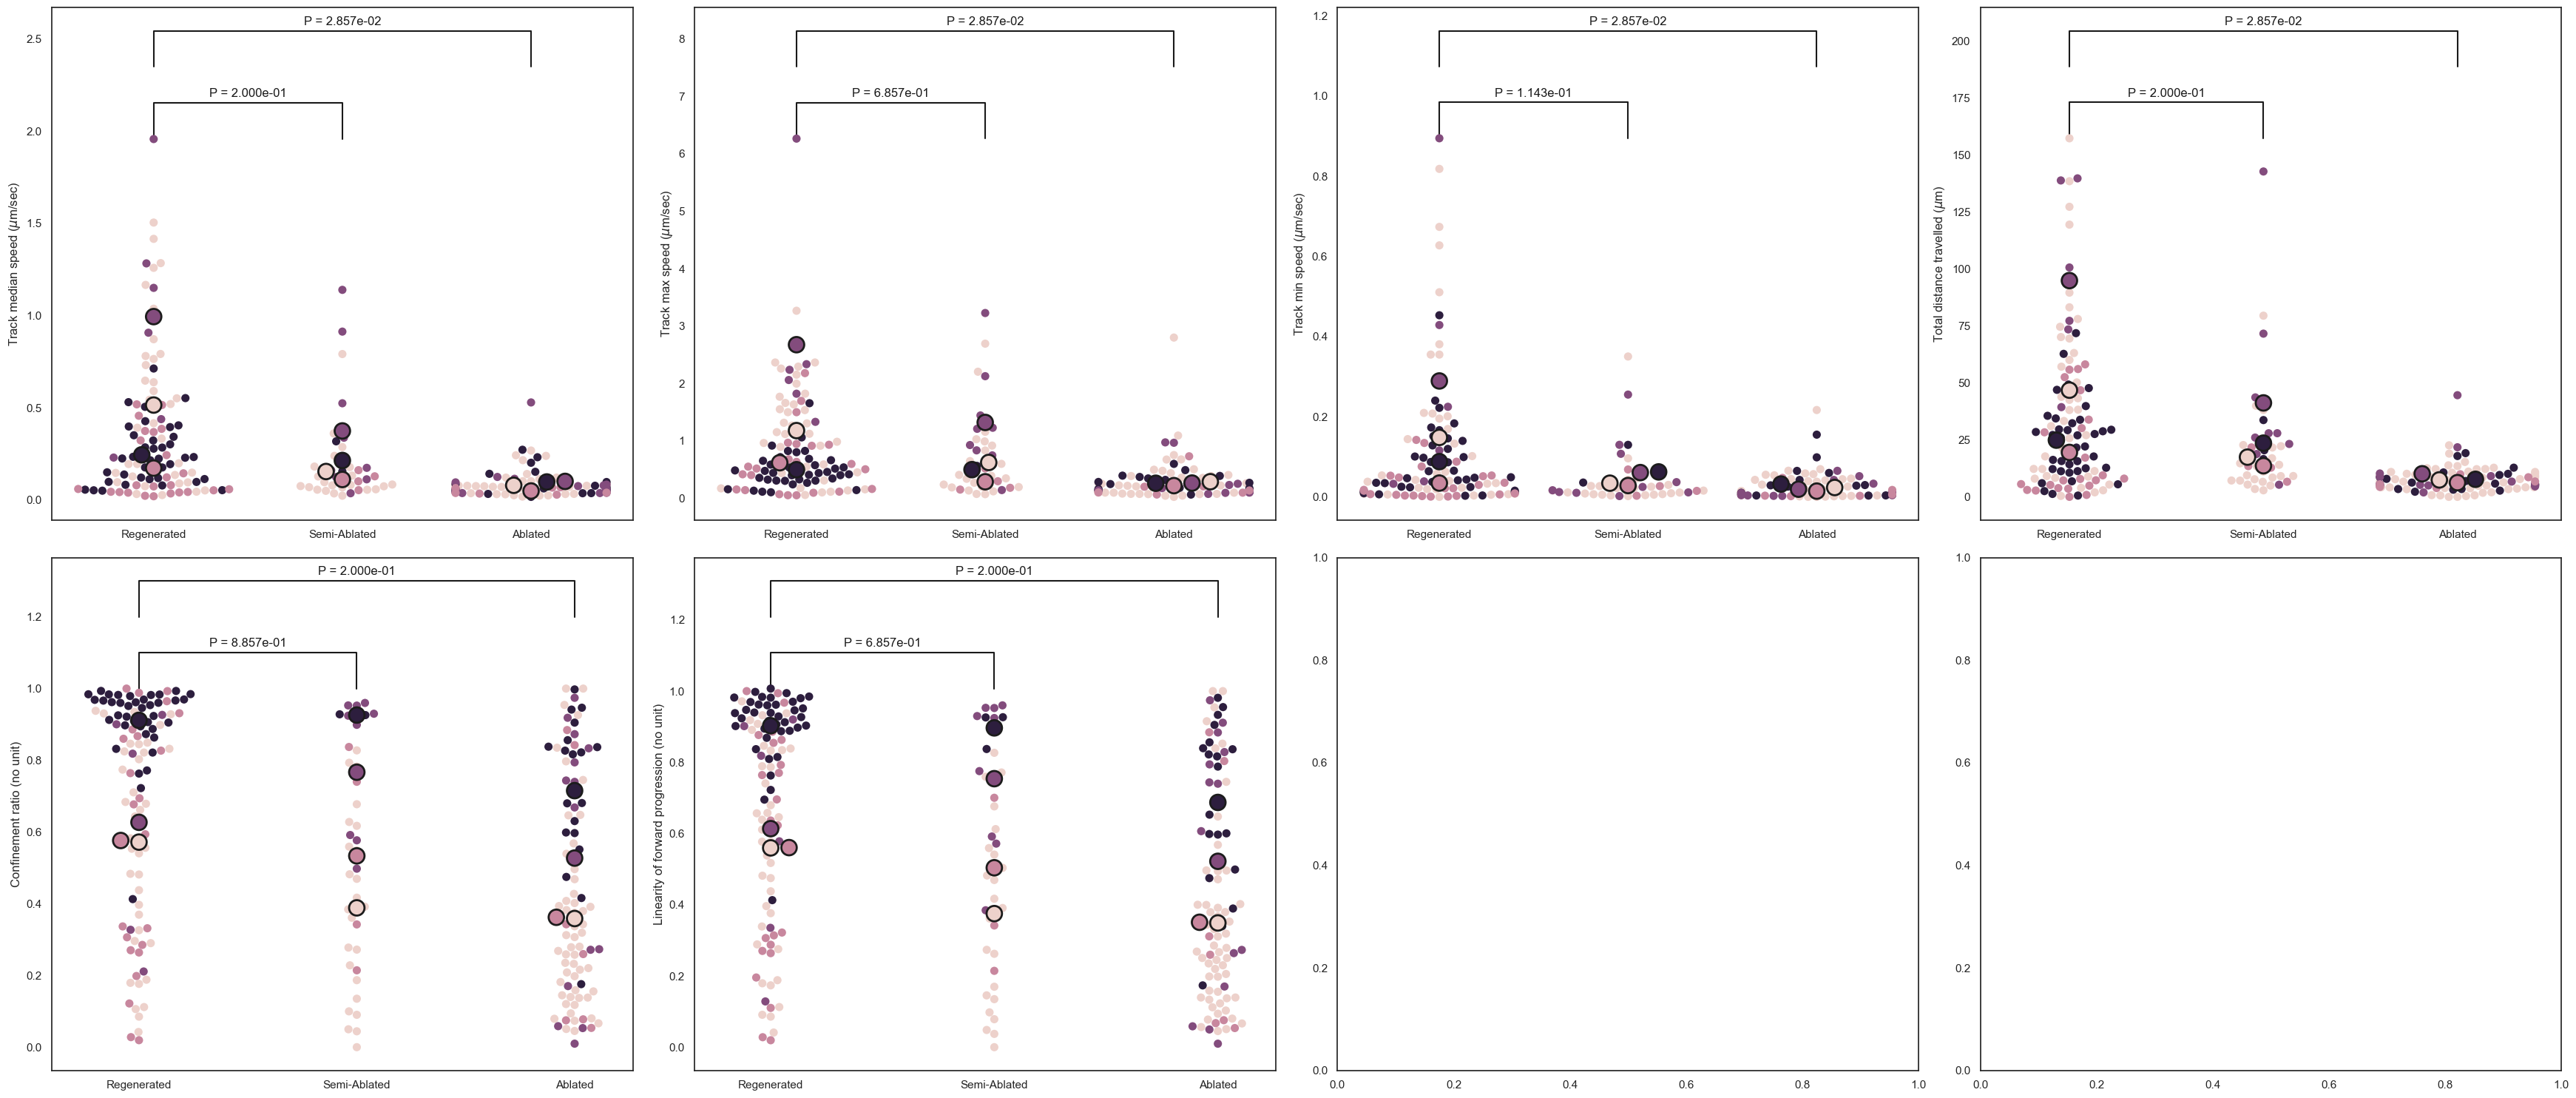

In [39]:
from scipy.stats import mannwhitneyu
import seaborn as sns
import matplotlib.pyplot as plt

# Replace names in the column 'treatment'
df['treatment'] = df['treatment'].replace({
    "regeneration": "Regenerated",
    "ablation": "Ablated",
    "semiablation": "Semi-Ablated"
})

# Create figure
fig, axes = plt.subplots(2, 4, figsize=(35, 15))

for idx, vars in enumerate(intcols):
    row, col = divmod(idx, 4)  
    ax = axes[row, col]

    sns.set_theme(style="white")

    # Group the data by replicate and treatment
    ReplicateAverages = df.groupby(['replicate', 'treatment'], as_index=False).agg({vars: "mean"})
    ReplicateAvePivot = ReplicateAverages.pivot_table(columns='treatment', values=vars, index="replicate")

    # Calculate p-values using Mann-Whitney U test
    stat1, pvalue1 = mannwhitneyu(ReplicateAvePivot['Regenerated'].dropna(), ReplicateAvePivot['Semi-Ablated'].dropna(), alternative='two-sided')
    stat2, pvalue2 = mannwhitneyu(ReplicateAvePivot['Regenerated'].dropna(), ReplicateAvePivot['Ablated'].dropna(), alternative='two-sided')

    # Swarmplot graph
    sns.swarmplot(
        x="treatment", y=vars, hue="replicate", data=df, legend=None,
        order=["Regenerated", "Semi-Ablated", "Ablated"], size=8, ax=ax
    )
    sns.swarmplot(
        x="treatment", y=vars, hue="replicate", size=15, linewidth=2,
        data=ReplicateAverages, order=["Regenerated", "Semi-Ablated", "Ablated"], ax=ax
    )

    # Putting p-value in the correct location
    y_max = df[vars].max()
    y_offset = y_max * 0.1  

    # Axes (Regenerated vs Semi-Ablated)
    ax.plot(
        [0, 0, 1, 1],
        [y_max, y_max + y_offset, y_max + y_offset, y_max],
        lw=1.5, color='k'
    )
    ax.text(
        0.5, y_max + y_offset + (y_offset * 0.1),
        f"P = {pvalue1:.3e}", ha='center', va='bottom', color='k'
    )

    # Adjust p-value location
    y_max = y_max + (2 * y_offset)

    # Lines and text for the p-value (Regenerated vs Ablated)
    ax.plot(
        [0, 0, 2, 2],
        [y_max, y_max + y_offset, y_max + y_offset, y_max],
        lw=1.5, color='k'
    )
    ax.text(
        1, y_max + y_offset + (y_offset * 0.1),
        f"P = {pvalue2:.3e}", ha='center', va='bottom', color='k'
    )

    # Legend-title
    ax.set_xlabel('')
    ax.set_ylabel(legcols[idx])
    ax.legend_.remove()

# Adjust design
plt.tight_layout()

# Save figure in SVG format
fig.savefig('./figures/movement_metrics_flagella_ablation_pvalue.svg', format='svg')


# Ciliobrevin C.flexa treatment

In [35]:
df=df_all[df_all['experiment']=='Dynein Inhibition']


C:\Users\mfreired\AppData\Local\Temp\ipykernel_28592\3907085440.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['treatment'] = df['treatment'].replace({
c:\Users\mfreired\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 49.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\mfreired\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 61.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\mfreired\AppData\Local\Programs\Python\Python313\Lib\site-packages\seabor

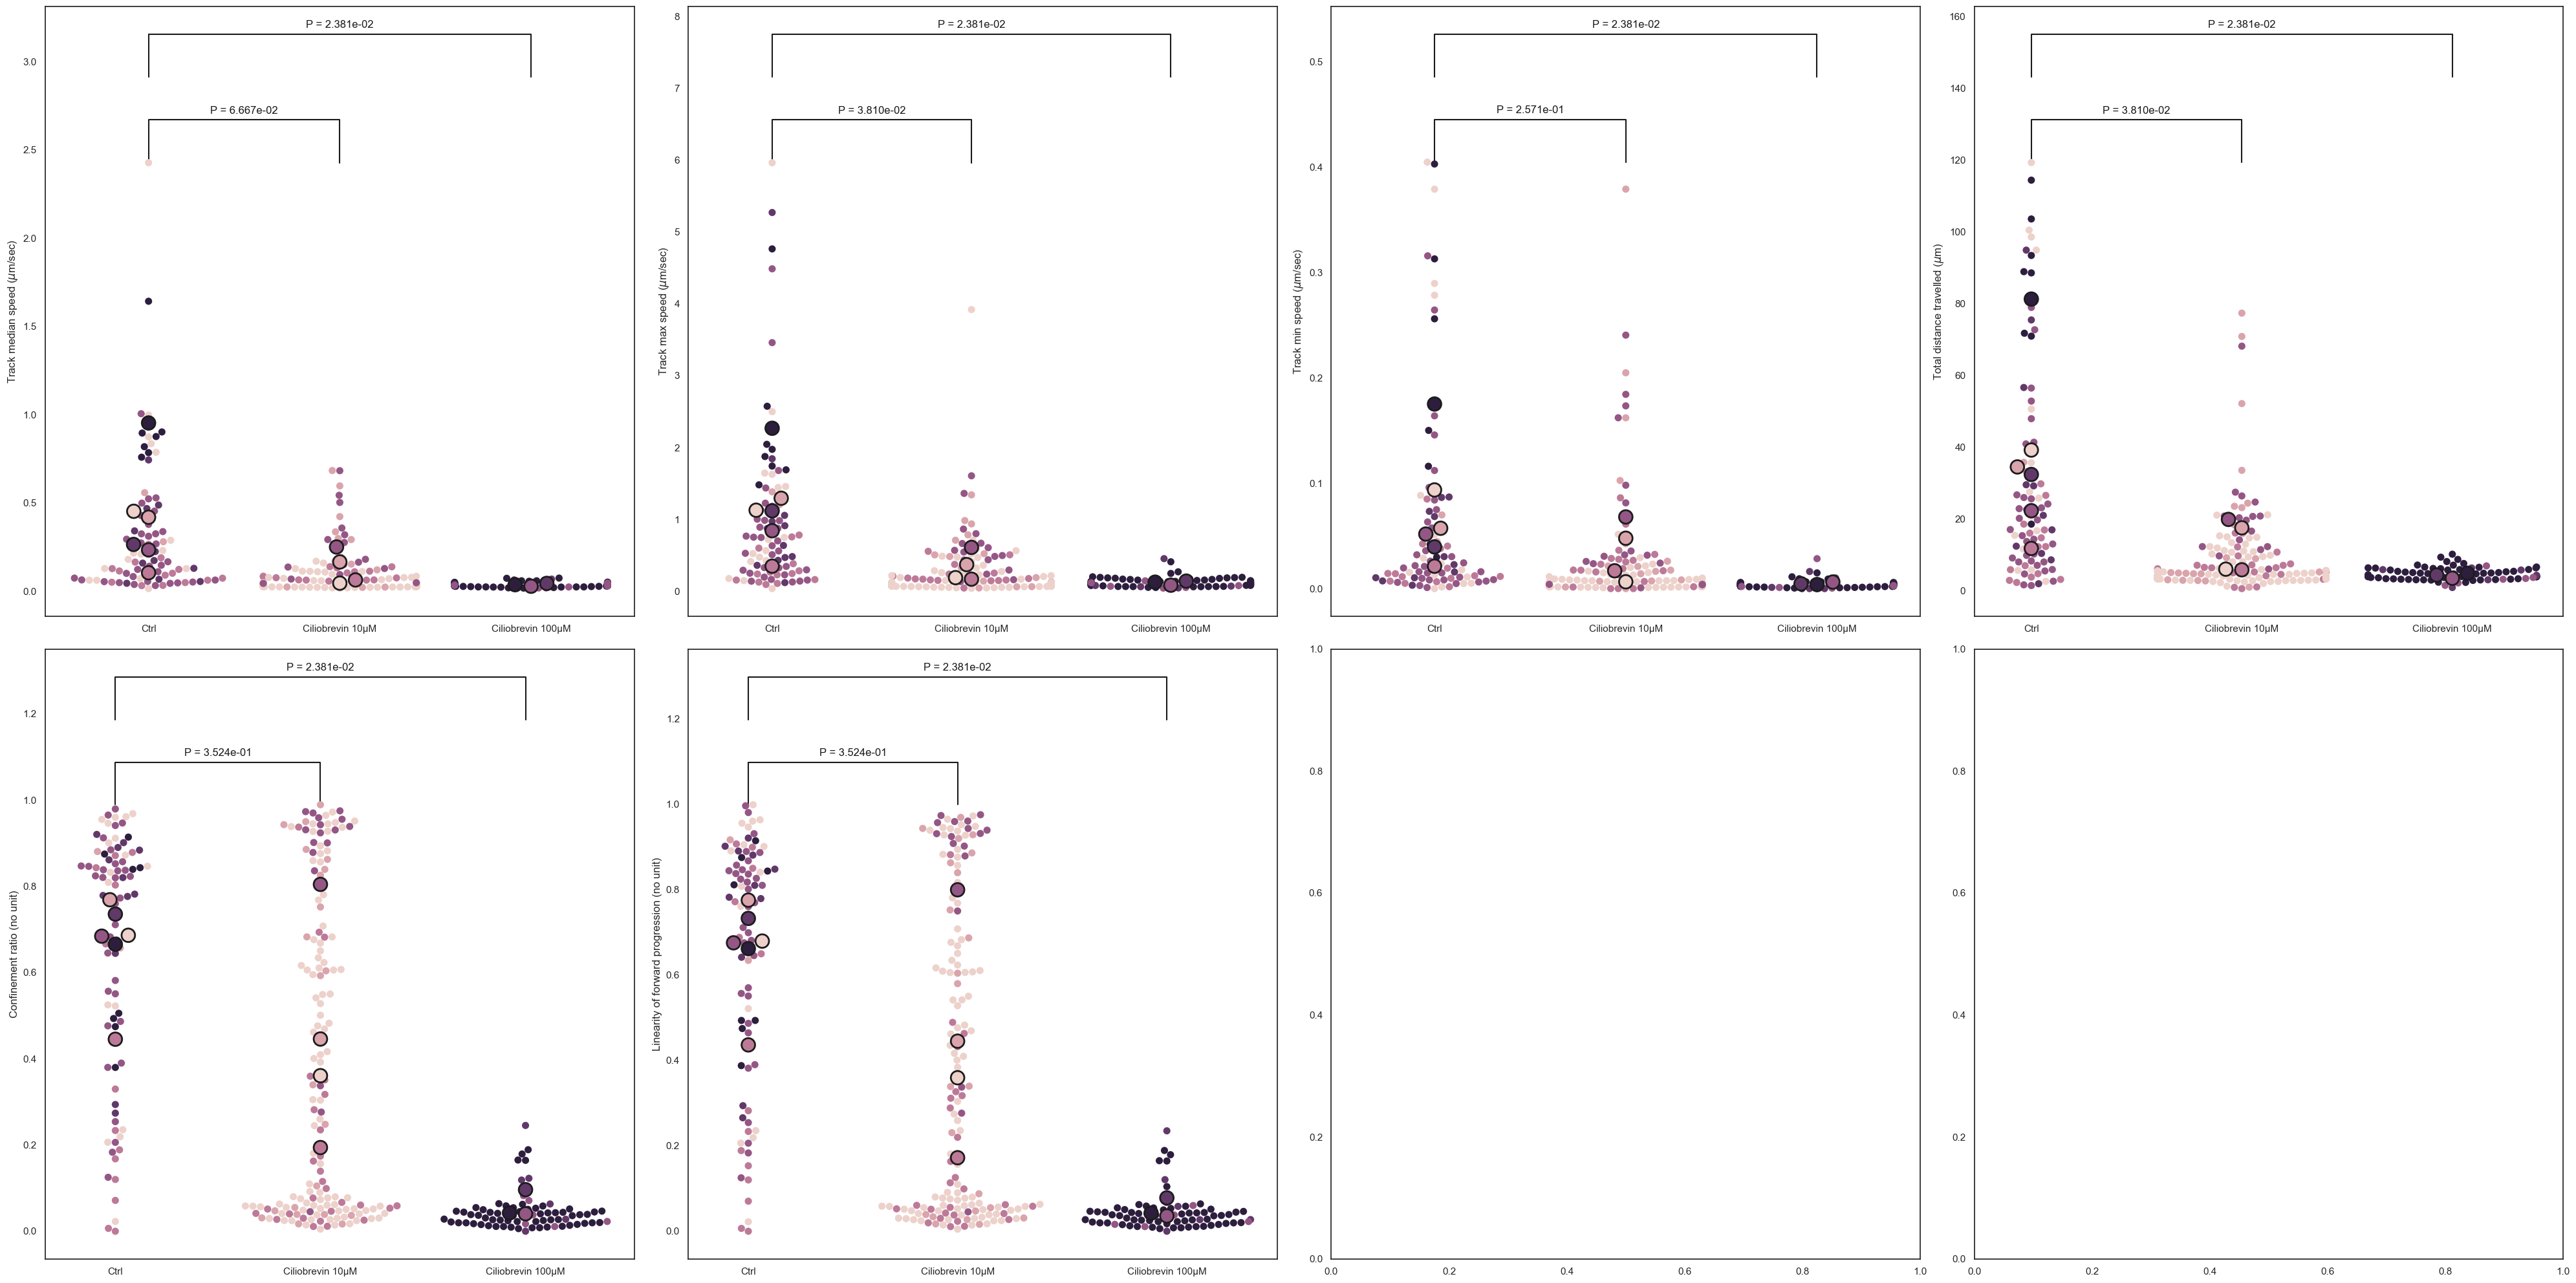

In [36]:
from scipy.stats import mannwhitneyu
import seaborn as sns
import matplotlib.pyplot as plt

# Replace names in the column treatment
df['treatment'] = df['treatment'].replace({
    "ctrl": "Ctrl",
    "ciliobrevin 10uM": "Ciliobrevin 10μM",
    "ciliobrevin 100uM": "Ciliobrevin 100μM"
})

ReplicateAverages['treatment'] = ReplicateAverages['treatment'].replace({
    "ctrl": "Ctrl",
    "ciliobrevin 10uM": "Ciliobrevin 10μM",
    "ciliobrevin 100uM": "Ciliobrevin 100μM"
})

# Create figure
fig, axes = plt.subplots(2, 4, figsize=(40, 20))

for idx, vars in enumerate(intcols):
    row, col = divmod(idx, 4)  
    ax = axes[row, col]

    sns.set_theme(style="white")
    # Group the data by replicate and treatment
    ReplicateAverages = df.groupby(['replicate', 'treatment'], as_index=False).agg({vars: "mean"})
    ReplicateAvePivot = ReplicateAverages.pivot_table(columns='treatment', values=vars, index="replicate")

    # p-values Mann-Whitney U test
    stat1, pvalue1 = mannwhitneyu(ReplicateAvePivot['Ctrl'].dropna(), ReplicateAvePivot['Ciliobrevin 10μM'].dropna(), alternative='two-sided')
    stat2, pvalue2 = mannwhitneyu(ReplicateAvePivot['Ctrl'].dropna(), ReplicateAvePivot['Ciliobrevin 100μM'].dropna(), alternative='two-sided')

    # Swarmplot graph
    sns.swarmplot(
        x="treatment", y=vars, hue="replicate", data=df, legend=None, 
        order=["Ctrl", "Ciliobrevin 10μM", "Ciliobrevin 100μM"], size=8, ax=ax
    )
    sns.swarmplot(
        x="treatment", y=vars, hue="replicate", size=15, linewidth=2, 
        data=ReplicateAverages, order=["Ctrl", "Ciliobrevin 10μM", "Ciliobrevin 100μM"], ax=ax
    )
    lines, labels = ax.get_legend_handles_labels()

    # Putting p-value in the correct location
    y_max = df[vars].max()
    y_offset = y_max * 0.1 

    ax.plot([0, 0, 1, 1], 
        [y_max, y_max + y_offset, y_max + y_offset, y_max], 
        lw=1.5, color='k'
    )
    ax.text(
        0.5, y_max + y_offset + (y_offset * 0.1), f"P = {pvalue1:.3e}", 
        ha='center', va='bottom', color='k'
    )

    y_max = y_max + (2 * y_offset)

    # Lines and text for the p-value (Regenerated vs Ablated)
    ax.plot(
        [0, 0, 2, 2], 
        [y_max, y_max + y_offset, y_max + y_offset, y_max], 
        lw=1.5, color='k'
    )
    ax.text(
        1, y_max + y_offset + (y_offset * 0.1), f"P = {pvalue2:.3e}", 
        ha='center', va='bottom', color='k'
    )

    # Legend-title
    ax.set_xlabel('')
    ax.set_ylabel(legcols[idx])
    ax.legend_.remove()

# Adjust design
plt.tight_layout()

# Save figure
fig.savefig('./figures/movement_metrics_dynein_inhibition_pvalue.svg', format='svg')


# Monosiga brevicollis metrics


In [31]:
df=df_all[df_all['experiment']=='monosiga']

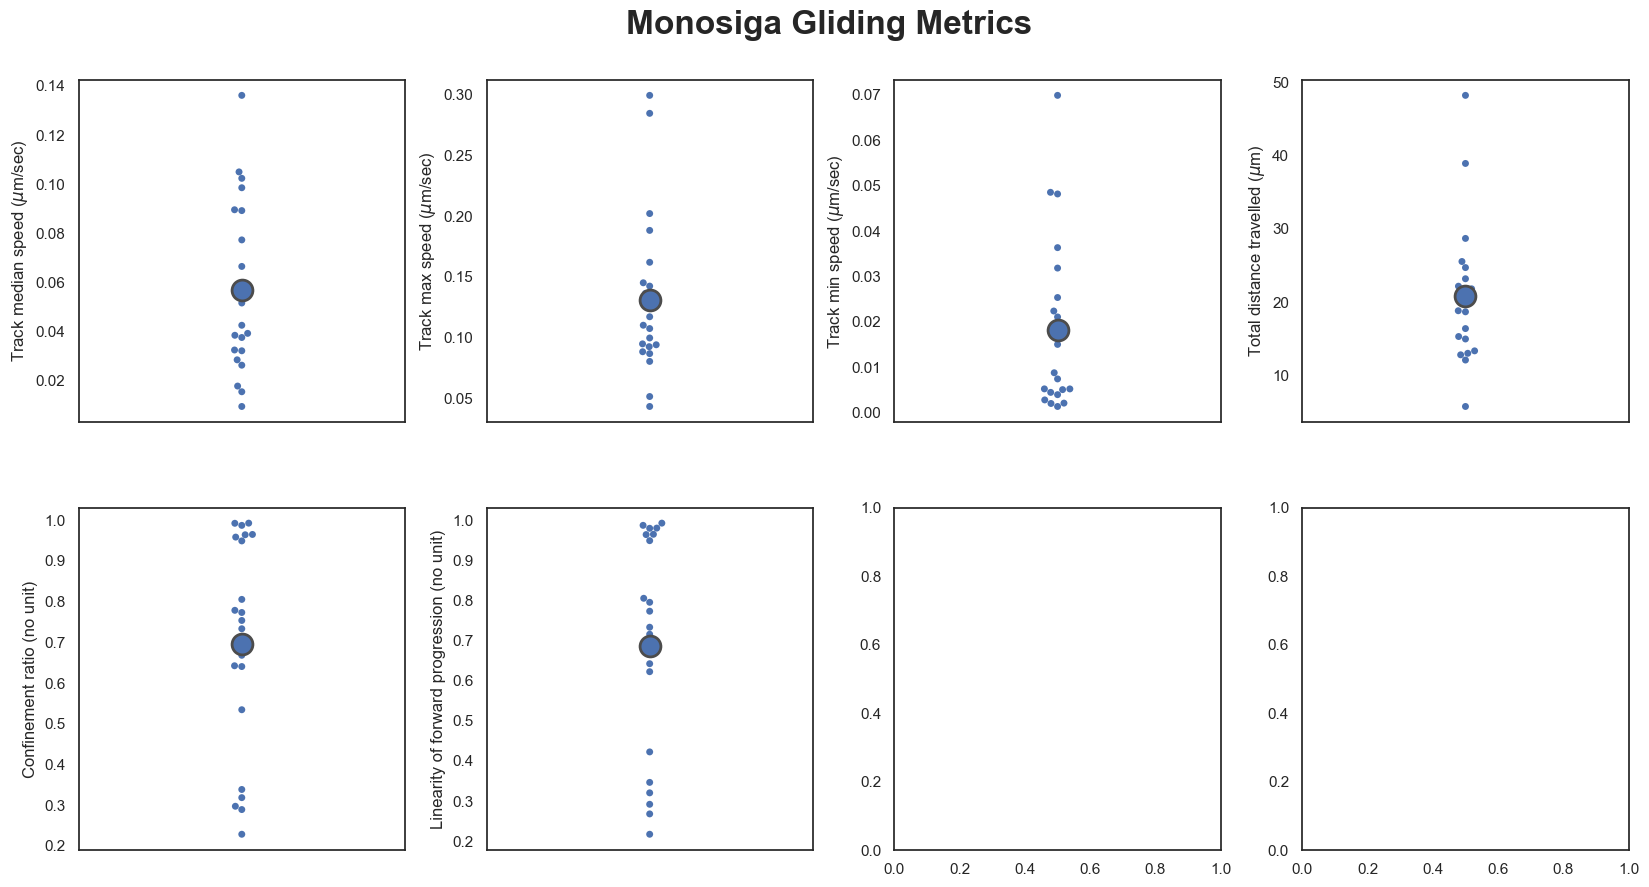

In [32]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10), facecolor='white') 
#plt.figure(figsize=(21,11))
i=0
j=0
for vars in intcols:
    i+=1
    sns.set_style('white')
    ReplicateAverages = df.groupby(['replicate','treatment'], as_index=False).agg({vars: "mean"})
    ReplicateAvePivot = ReplicateAverages.pivot_table(columns='treatment', values=vars, index="replicate")
    #statistic, pvalue = scipy.stats.ttest_rel(ReplicateAvePivot['Control'], ReplicateAvePivot['Drug'])
    #P_value = str(float(round(pvalue, 3)))
    plt.subplot(2,4,i)
    plt.subplots_adjust(hspace=0.25, wspace=0.25)
    sns.swarmplot(x="treatment", y=vars, hue="replicate", data=df,legend=False)
    ax = sns.swarmplot(x="treatment", y=vars, hue="replicate", size=15, linewidth=2, data=ReplicateAverages)
    lines,labels=ax.get_legend_handles_labels()
    #ax.legend_.remove()
    x1, x2 = 0, 1
    y, h, col = df[vars].max() + 2, 2, 'k'
    #plt.ylim(0,1.1)
    plt.xlabel('')
    plt.ylabel(legcols[j])
    ax.set_xticks([])
    j+=1
    ax.legend_.remove() 



#plt.suptitle('M.brevicollis movement metrics') 

#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
#plt.text((x1+x2)*.5, y+h*2, "P = "+P_value, ha='center', va='bottom', color=col)
fig.suptitle('Monosiga Gliding Metrics', fontsize=24,weight='bold', y=0.95)
fig.savefig('./figures/monosiga_movement_metrics_gliding.svg',format='svg')


# Salpingoeca rosetta Metrics

In [33]:
df=df_all[df_all['experiment']=='srosetta']

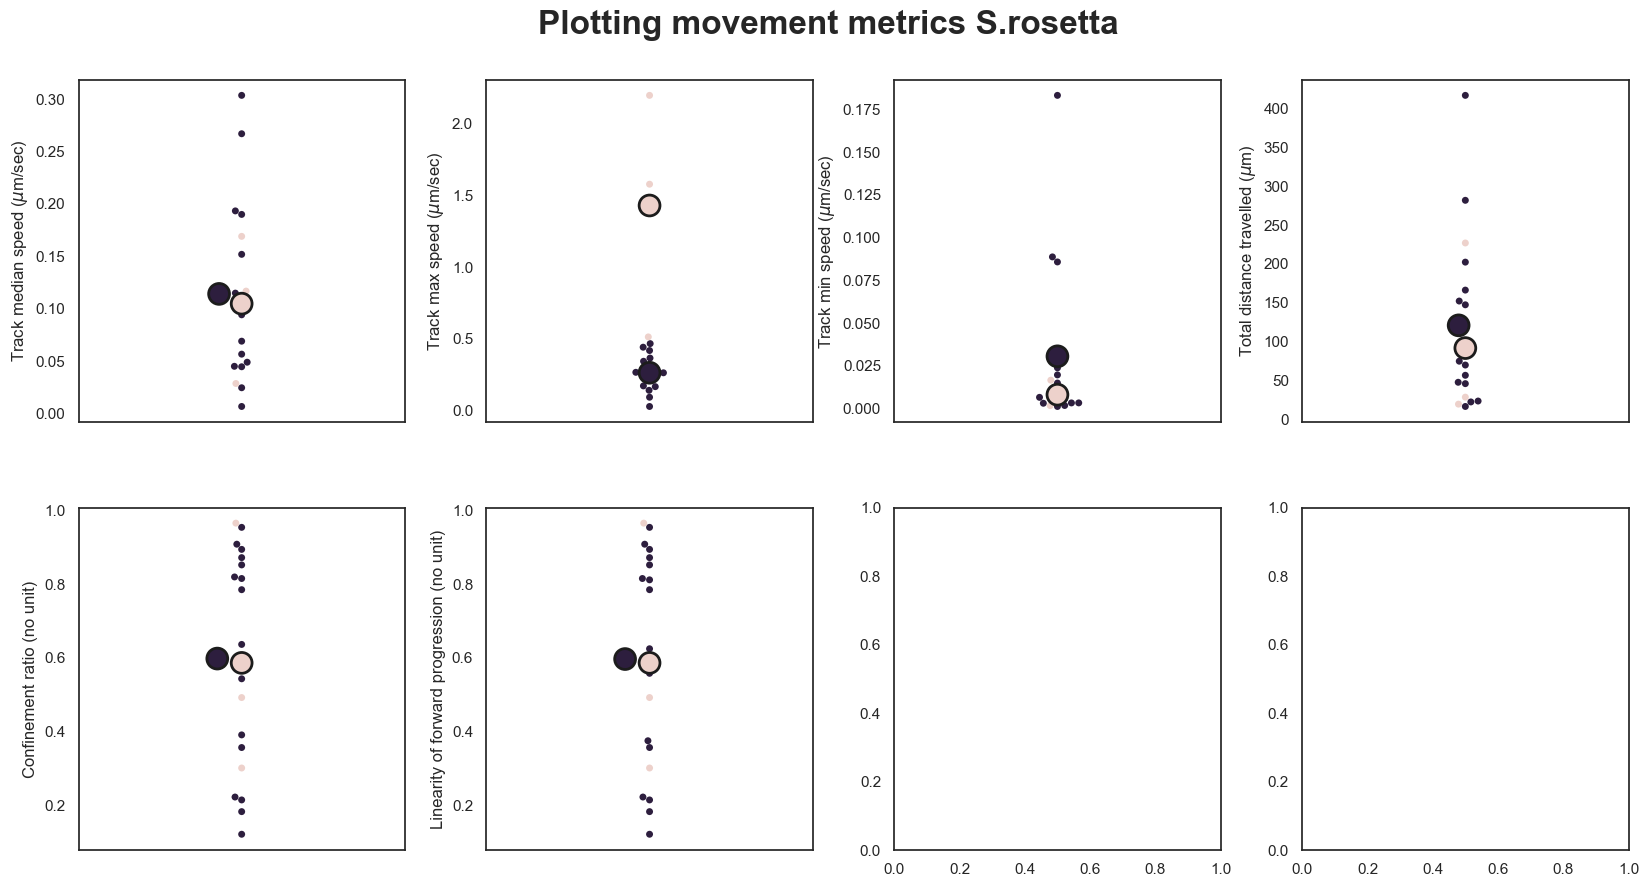

In [34]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10), facecolor='white') 
#plt.figure(figsize=(20,10))
i=0
j=0
for vars in intcols:
    i+=1
    sns.set_style('white')
    ReplicateAverages = df.groupby(['replicate','treatment'], as_index=False).agg({vars: "mean"})
    ReplicateAvePivot = ReplicateAverages.pivot_table(columns='treatment', values=vars, index="replicate")
    #statistic, pvalue = scipy.stats.ttest_rel(ReplicateAvePivot['Control'], ReplicateAvePivot['Drug'])
    #P_value = str(float(round(pvalue, 3)))
    plt.subplot(2,4,i)
    plt.subplots_adjust(hspace=0.25, wspace=0.25)
    sns.swarmplot(x="treatment", y=vars, hue="replicate", data=df,legend=None)
    ax = sns.swarmplot(x="treatment", y=vars, hue="replicate", size=15, linewidth=2, data=ReplicateAverages)
    lines,labels=ax.get_legend_handles_labels()
    #ax.legend_.remove()
    x1, x2 = 0, 1
    y, h, col = df[vars].max() + 2, 2, 'k'
    #plt.ylim(0,1.1)
    plt.xlabel('')
    plt.ylabel(legcols[j])
    ax.set_xticks([])
    j+=1
    ax.legend_.remove() 



#plt.suptitle('S.rosetta gliding metrics') 

#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
#plt.text((x1+x2)*.5, y+h*2, "P = "+P_value, ha='center', va='bottom', color=col)
fig.suptitle('Plotting movement metrics S.rosetta', fontsize=24,weight='bold', y=0.95)
fig.savefig('./figures/srosetta_movement_metrics_gliding.svg',format='svg')